In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib 
matplotlib.rcParams["figure.figsize"] = (20,10)

In [2]:
df = pd.read_csv("House_data.csv")
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
#Aggregate or group by  
df.groupby('area_type')['area_type'].agg("count")

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [4]:
#remove unrelated data 
df_clean = df.drop(['area_type','society','balcony','availability'],axis='columns')
df_clean.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [5]:
#count which columns has a null value and count them
df_clean.isnull().sum()
#in this example we have 73 bathroom nulls and the total rows are
# however we could also get median value and fill those values for missing one

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [6]:
# this will give good stat /info about the data counts mean median etc.
df_clean.describe()

,bath,price
count,13247.000000,13320.000000
mean,2.692610,112.565627
std,1.341458,148.971674
min,1.000000,8.000000
25%,2.000000,50.000000
50%,2.000000,72.000000
75%,3.000000,120.000000
max,40.000000,3600.000000


In [7]:
df_clean_no_null = df_clean.dropna()

In [8]:
df_clean_no_null.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [9]:
df_clean_no_null.shape


(13246, 5)

In [10]:
#printe the distinct values of a column
df_clean_no_null['size'].unique()


array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [11]:
# since the data was string and number and bedroom and room we are going further massage it 
df_clean_no_null['bedroom_cnt'] = df_clean_no_null['size'].apply(lambda x:int(x.split(' ')[0]))


/var/folders/nb/7k8350y136xbvn00q__p4y4m0000gr/T/ipykernel_59182/794756741.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean_no_null['bedroom_cnt'] = df_clean_no_null['size'].apply(lambda x:int(x.split(' ')[0]))


In [12]:
df_clean_no_null.head()

,location,size,total_sqft,bath,price,bedroom_cnt
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [13]:
df_clean_no_null['bedroom_cnt'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18])

In [14]:
df_clean_no_null[df_clean_no_null.bedroom_cnt>20]

,location,size,total_sqft,bath,price,bedroom_cnt
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


In [15]:
df_clean_no_null.total_sqft.unique()


array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [16]:
# check to see if the data has a float value 0.0 etc 
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [17]:
#run the function is_float for the data set 
# ~ indicate the opposite function 
df_clean_no_null[~df_clean_no_null['total_sqft'].apply(is_float)]

,location,size,total_sqft,bath,price,bedroom_cnt
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
...,...,...,...,...,...,...
12975,Whitefield,2 BHK,850 - 1060,2.0,38.190,2
12990,Talaghattapura,3 BHK,1804 - 2273,3.0,122.000,3
13059,Harlur,2 BHK,1200 - 1470,2.0,72.760,2
13265,Hoodi,2 BHK,1133 - 1384,2.0,59.135,2


In [18]:
# we are going to remove the ranges value for total_sqft example 1145 - 1340
def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [19]:
convert_sqft_to_num('2166')

2166.0

In [20]:
# test to make sure when we have alpha numeric field we simply retrun blank
convert_sqft_to_num('34.46Sq. Meter')

In [21]:
# here we run our convert_sqft_to_num to fruther clean up our data
df_cln_cpy = df_clean_no_null.copy()
df_cln_cpy['total_sqft'] =df_cln_cpy['total_sqft'].apply(convert_sqft_to_num)
df_cln_cpy.head(3)


,location,size,total_sqft,bath,price,bedroom_cnt
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3


In [22]:
#print the row of data  , loc means location
df_cln_cpy.loc[30]

location       Yelahanka
size               4 BHK
total_sqft        2475.0
bath                 4.0
price              186.0
bedroom_cnt            4
Name: 30, dtype: object

In [23]:
#we are going to copy and add another column so we can get price per square feet
df_w_price_cpy = df_cln_cpy.copy()
df_w_price_cpy['price_per_sqft'] = df_w_price_cpy['price']*100000/df_w_price_cpy['total_sqft']
df_w_price_cpy.head()

,location,size,total_sqft,bath,price,bedroom_cnt,prince_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [24]:
len(df_w_price_cpy.location.unique())

1304

In [25]:
# since there are too many dimensions of data that cause problems for us
df_w_price_cpy.location = df_w_price_cpy.location.apply(lambda x: x.strip())
# print list in Descending order
location_stats = df_w_price_cpy.groupby('location')['location'].agg('count').sort_values(ascending=False)
# to print all rows otherwise jupyter will show three dots 
print(location_stats.to_string())



location
Whitefield                                            535
Sarjapur  Road                                        392
Electronic City                                       304
Kanakpura Road                                        266
Thanisandra                                           236
Yelahanka                                             210
Uttarahalli                                           186
Hebbal                                                176
Marathahalli                                          175
Raja Rajeshwari Nagar                                 171
Bannerghatta Road                                     152
Hennur Road                                           150
7th Phase JP Nagar                                    149
Haralur Road                                          141
Electronic City Phase II                              131
Rajaji Nagar                                          106
Chandapura                                             98
Bella

In [26]:
len(location_stats[location_stats<=10])

1052

In [27]:
location_stats_less_than_10 = location_stats[location_stats<=10]
print(location_stats_less_than_10.to_string())


location
Basapura                                              10
1st Block Koramangala                                 10
Gunjur Palya                                          10
Kalkere                                               10
Sector 1 HSR Layout                                   10
Dairy Circle                                          10
Naganathapura                                         10
Sadashiva Nagar                                       10
Nagadevanahalli                                       10
BTM 1st Stage                                         10
Nagappa Reddy Layout                                  10
Dodsworth Layout                                      10
Ganga Nagar                                           10
2nd Phase JP Nagar                                     9
Volagerekallahalli                                     9
Yemlur                                                 9
4th Block Koramangala                                  9
Lingarajapuram        

In [28]:
# here we say if there is outlier (i.e. the location category is less than 10 then simply rename the locaton as others 
df_w_price_cpy.location = df_w_price_cpy.location.apply(lambda x: 'other' if x in location_stats_less_than_10 else x)
len(df_w_price_cpy.location.unique())

242

In [29]:
df_w_price_cpy.head(10)

,location,size,total_sqft,bath,price,bedroom_cnt,prince_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
5,Whitefield,2 BHK,1170.0,2.0,38.00,2,3247.863248
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4,7467.057101
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4,18181.818182
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3,4828.244275
9,other,6 Bedroom,1020.0,6.0,370.00,6,36274.509804


In [30]:
## we are making an assumption that the business or data science team has indicate if price per
## squre feet being lower than 300 then it  might indicate bad data so here is how
## we are identifying it, the below are eaxmples of outliers 
df_w_price_cpy[df_w_price_cpy.total_sqft/df_w_price_cpy.bedroom_cnt<300].head()

,location,size,total_sqft,bath,price,bedroom_cnt,prince_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,100.0,3,20000.000000


In [31]:
df_w_price_cpy.shape


(13246, 7)

In [32]:
## this is saying select the opposite of the () condition
df_outliers_out = df_w_price_cpy[~(df_w_price_cpy.total_sqft/df_w_price_cpy.bedroom_cnt<300)]
df_outliers_out.shape

(12502, 7)

In [33]:
df_outliers_out.prince_per_sqft.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: prince_per_sqft, dtype: float64

In [34]:
## a function to remove outloer per location for data frame
## a function to remove outlier per location for data frame
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    #for each location
    for key, subdf in df.groupby('location'):        
        # current mean 
        current_mean = np.mean(subdf.prince_per_sqft)
        #current standard deviation
        current_std = np.std(subdf.prince_per_sqft)
        # now create a sub data frame that only includes the price_per_sqft that are only within first standard deviation
        #Lower Bound=𝜇−𝜎
        #Lower Bound=μ−σ
        reduced_df = subdf[(subdf.prince_per_sqft>(current_mean-current_std)) & (subdf.prince_per_sqft<=(current_mean+current_std))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out

df_first_std_only =remove_pps_outliers(df_outliers_out)
df_first_std_only.shape


(10241, 7)

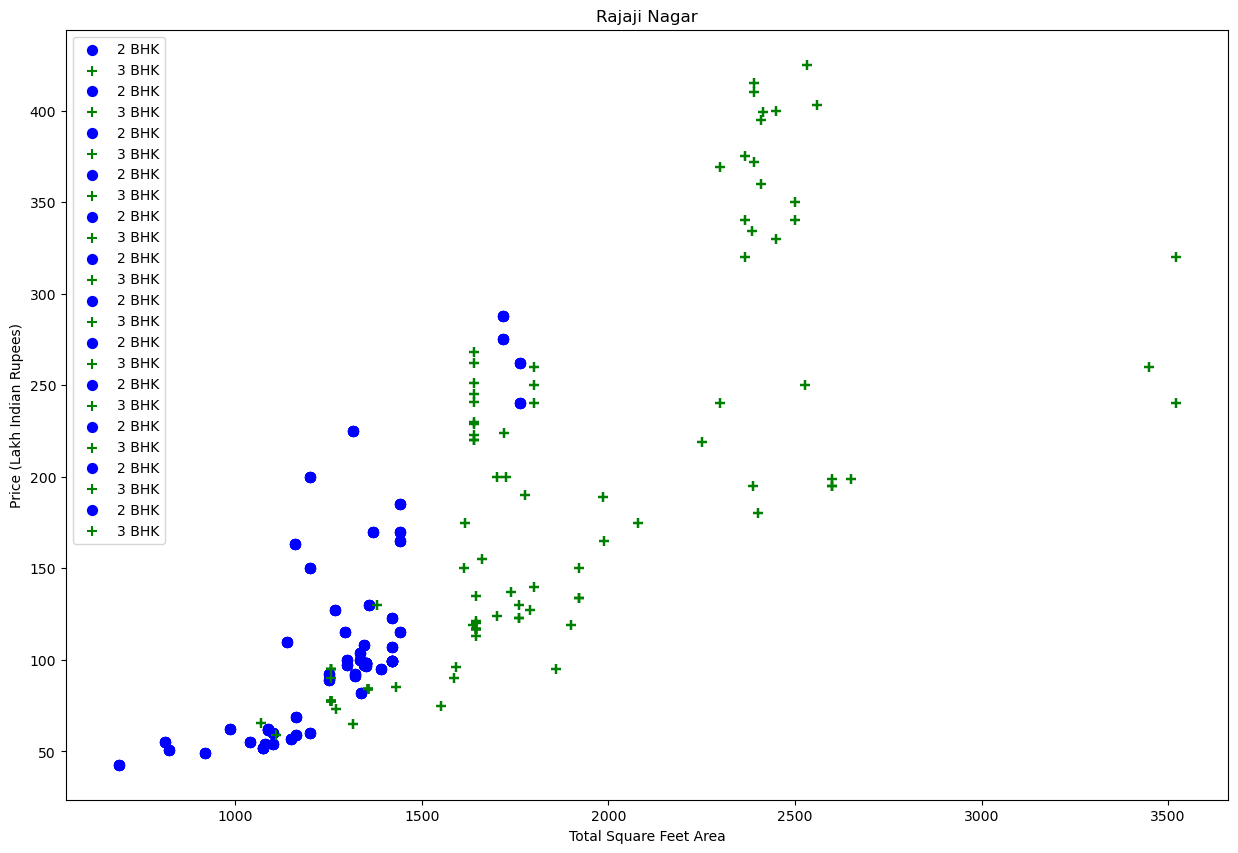

In [96]:
##scater plot /graph / chart
def plot_scatter_chart(df,location):
    bedroom_cnt_2 = df[(df.location==location) & (df.bedroom_cnt==2)]
    bedroom_cnt_3 = df[(df.location==location) & (df.bedroom_cnt==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bedroom_cnt_2.total_sqft,bedroom_cnt_2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bedroom_cnt_3.total_sqft,bedroom_cnt_3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()
    plt.show()
    
plot_scatter_chart(df_first_std_only,"Rajaji Nagar")


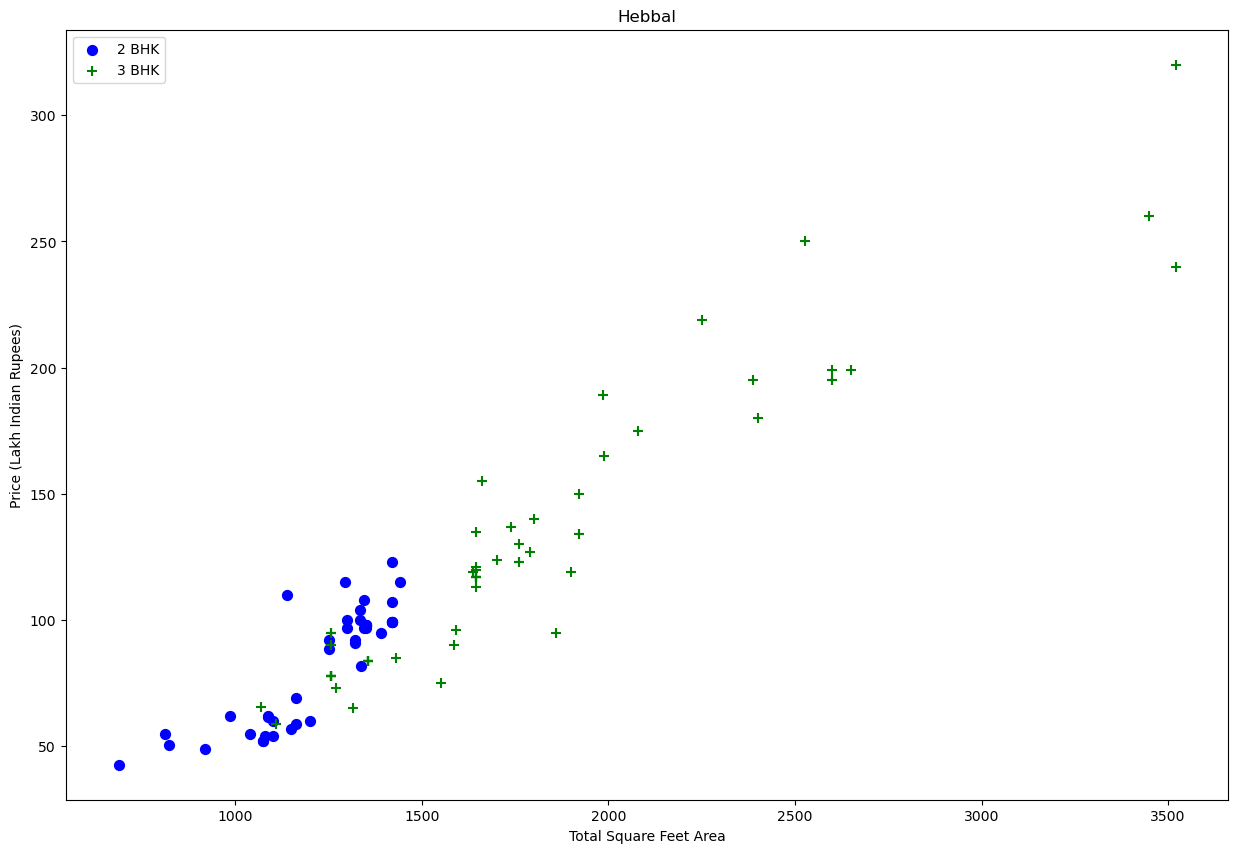

In [98]:
##scater plot /graph / chart
def plot_scatter_chart(df,location):
    bedroom_cnt_2 = df[(df.location==location) & (df.bedroom_cnt==2)]
    bedroom_cnt_3 = df[(df.location==location) & (df.bedroom_cnt==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bedroom_cnt_2.total_sqft,bedroom_cnt_2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bedroom_cnt_3.total_sqft,bedroom_cnt_3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()
    plt.show() 
#plot_scatter_chart(df_first_std_only,"Rajaji Nagar")
plot_scatter_chart(df_first_std_only,"Hebbal")

In [135]:
# here we need to remove the the 2 bedroom apartments where price per square feet is less the the mean of price per square feet of 1 apartment.
# it simply does not make sense to have 2 bedroom apartments have lower price per square feet at least in this case but in real
# life example this could be cause of location or some amenuties ot being close to beach etc

def remove_bedroom_cnt_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bedroom_cnt_stats = {}
        print(location_df)
        print(location)
        for bedroom_cnt, bedroom_cnt_df in location_df.groupby('bedroom_cnt'):
            bedroom_cnt_stats[bedroom_cnt] = {
                'mean': np.mean(bedroom_cnt_df.price_per_sqft),
                'std': np.std(bedroom_cnt_df.price_per_sqft),
                'count': bedroom_cnt_df.shape[0]
            }
        for bedroom_cnt, bedroom_cnt_df in location_df.groupby('bedroom_cnt'):
            stats = bedroom_cnt_stats.get(bedroom_cnt-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bedroom_cnt_df[bedroom_cnt_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')

df_removed_outlier_2bedroom = remove_bedroom_cnt_outliers(df_first_std_only)
# df8 = df7.copy()
df_removed_outlier_2bedroom.shape

              location   size  total_sqft  bath  price  bedroom_cnt  \
0  1st Block Jayanagar  4 BHK      2850.0   4.0  428.0            4   
1  1st Block Jayanagar  3 BHK      1630.0   3.0  194.0            3   
2  1st Block Jayanagar  3 BHK      1875.0   2.0  235.0            3   
3  1st Block Jayanagar  3 BHK      1200.0   2.0  130.0            3   
4  1st Block Jayanagar  2 BHK      1235.0   2.0  148.0            2   
5  1st Block Jayanagar  4 BHK      2750.0   4.0  413.0            4   
6  1st Block Jayanagar  4 BHK      2450.0   4.0  368.0            4   

   prince_per_sqft  
0     15017.543860  
1     11901.840491  
2     12533.333333  
3     10833.333333  
4     11983.805668  
5     15018.181818  
6     15020.408163  
1st Block Jayanagar


AttributeError: 'DataFrame' object has no attribute 'price_per_sqft'

In [126]:
#print(df_first_std_only['bedroom_cnt'].isnull().sum())  #
print(df_first_std_only.dtypes)
#print(df_first_std_only.columns) 
#print(df_first_std_only.to_string())

location            object
size                object
total_sqft         float64
bath               float64
price              float64
bedroom_cnt          int64
prince_per_sqft    float64
dtype: object
